In [1]:
from pathlib import Path
root_dir = Path("/mnt/infonas/data/nlokesh/image_recourse")
import sys
sys.path.insert(0, str(root_dir))
sys.path.insert(0, str(root_dir / "our_method"))
import numpy as np
import pandas as pd
import torch

In [2]:
import pickle as pkl
rsij_dir = root_dir / "our_method/results/models/greedy_rec"

In [3]:
import our_method.constants as constants
import utils.common_utils as cu
import utils.our_main_helper as main_helper

dh = main_helper.get_data_helper(dataset_name = constants.SHAPENET)

In [4]:
ideal_betas = dh._train._ideal_betas
Beta = dh._train._Beta
Siblings = dh._train._Siblings
y = dh._train._y

In [5]:
good_r_counts = []
total_r = []
r_beta_freq = {
    "beta": [],
    "cnt": [],
    "y": []
}

Total_runs = 26
# for r_iter in (np.arange(1, Total_runs)*20)-1:
with open(rsij_dir / "shapenet-min-R-Sij.pkl", "rb") as file:
    rsij = pkl.load(file)

R = rsij["R"]
Sij = rsij["Sij"]

total_r.append(len(R))
good_r_counts.append(np.sum(ideal_betas[np.array(R)]))
unq, cnt = np.unique(Beta[R], axis=0, return_counts=True)

r_beta_freq["beta"].append(unq)
r_beta_freq["cnt"].append(cnt)    
r_beta_freq["y"].append(y[R])

In [6]:
pd.DataFrame({"ideal": good_r_counts, "total": total_r})

,ideal,total
0,58,500


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams.update({'figure.figsize':(20,30), 'figure.dpi':100})

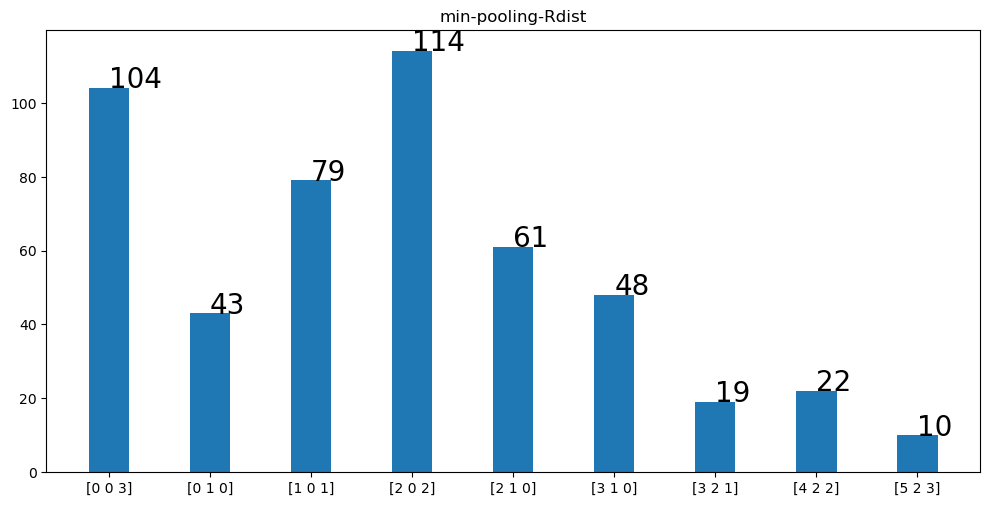

In [9]:
for idx in range(len(r_beta_freq["beta"])):
    beta, cnt = r_beta_freq["beta"][idx], r_beta_freq["cnt"][idx]
    beta = [str(entry) for entry in beta]

    N = len(cnt)
    ind = np.arange(N)
    fig, ax = plt.subplots(figsize = (10,5))
    ax.bar(beta, cnt, width=0.4)

    for index,data in enumerate(cnt):
        plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=20))
    plt.tight_layout()
    
    plt.title(f"min-pooling-Rdist")
    
    plt.savefig(f"r_imgs/min_pooling/R=500.png")


# y-plots

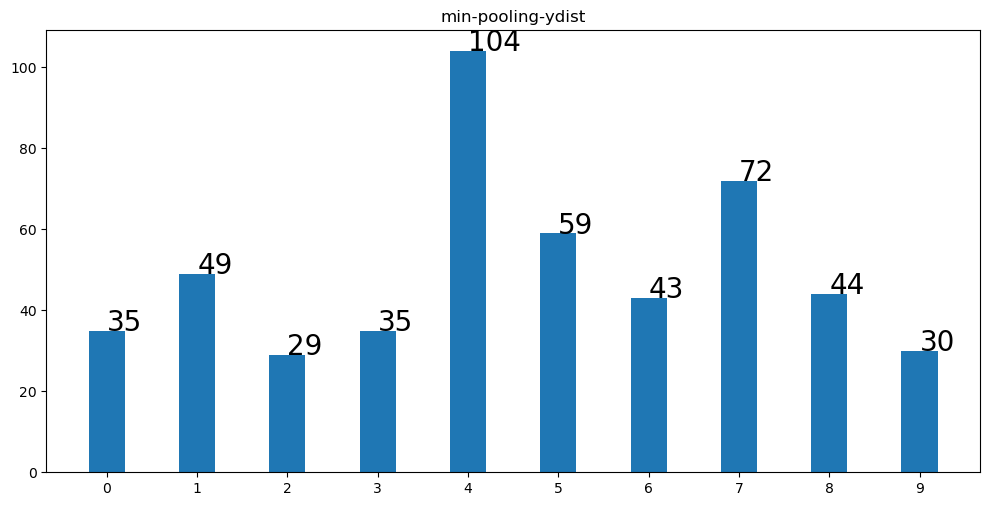

In [10]:
for idx in range(len(r_beta_freq["beta"])):
    y, cnt =  np.unique(r_beta_freq["y"][idx], return_counts=True)
    y = [str(entry) for entry in y]

    N = len(cnt)
    ind = np.arange(N)
    fig, ax = plt.subplots(figsize = (10,5))
    ax.bar(y, cnt, width=0.4)

    for index,data in enumerate(cnt):
        plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=20))
    plt.tight_layout()
    
    plt.title(f"min-pooling-ydist")
    
    plt.savefig(f"r_imgs/min_pooling/ydist-R=500.png")


# Recourse Beta

In [4]:
beta_dir = root_dir / "our_method/results/models/nnphi"

In [7]:
reg_pt = beta_dir / "tgtbetas-budget=500.pt"
reg_beta = torch.load(reg_pt)
finetune_pt = beta_dir / "tgtbetas-fineR-budget=500.pt"
finetune_beta = torch.load(finetune_pt)

In [10]:
def plot_beta(beta_arr, suffix):

    beta, cnt = np.unique(beta_arr, axis=0, return_counts=True)
    beta = [str(entry) for entry in beta]

    N = len(cnt)
    ind = np.arange(N)
    fig, ax = plt.subplots(figsize = (10,5))
    ax.bar(beta, cnt, width=0.4)

    for index,data in enumerate(cnt):
        plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=20))
    plt.tight_layout()

    plt.title(f"Theta = {suffix}")

    plt.savefig(f"Theta = {suffix}.png")

In [12]:
plot_beta(reg_beta.cpu().numpy(), "Nornal Theta")

NameError: name 'plt' is not defined